In [1]:
import os
from copy import deepcopy
# set the directory to the root
os.chdir("/Users/jeandurand/Documents/Masters Thesis/causal_bayes_opt")
from algorithms.CBO_algorithm import CBO
from algorithms.CEO_algorithm import CEO
import matplotlib.pyplot as plt
import seaborn as sns

from graphs.graph_6_nodes import Graph6Nodes
from graphs.data_setup import setup_observational_interventional

n_obs = 200
n_int = 2
n_anchor_points = 35
seeds_int_data = 42


all_graph_edges = [
    [
        ("A", "B"),
        ("A", "C"),
        ("A", "S"),
        ("A", "As"),
        ("A", "Y"),
        ("B", "As"),
        ("B", "C"),
        ("B", "S"),
        ("B", "Y"),
        ("As", "C"),
        ("As", "Y"),
        ("S", "C"),
        ("S", "Y"),
        ("C", "Y"),
    ],
    [
        ("A", "B"),
        ("A", "C"),
        ("A", "S"),
        ("A", "As"),
        ("A", "Y"),
        ("B", "As"),
        ("B", "C"),
        ("B", "S"),
        ("B", "Y"),
        ("As", "C"),
        # ("As", "Y"),
        ("S", "C"),
        ("S", "Y"),
        ("C", "Y"),
    ],
    [
        ("A", "B"),
        ("A", "C"),
        ("A", "S"),
        ("A", "As"),
        ("A", "Y"),
        ("B", "As"),
        ("B", "C"),
        ("B", "S"),
        ("B", "Y"),
        ("As", "C"),
        ("As", "Y"),
        ("S", "C"),
        # ("S", "Y"),
        ("C", "Y"),
    ],
    [
        ("A", "B"),
        ("A", "C"),
        ("A", "S"),
        ("A", "As"),
        ("A", "Y"),
        ("B", "As"),
        ("B", "C"),
        ("B", "S"),
        ("B", "Y"),
        ("As", "C"),
        # ("As", "Y"),
        ("S", "C"),
        # ("S", "Y"),
        ("C", "Y"),
    ],
    [
        ("A", "B"),
        ("A", "C"),
        ("A", "S"),
        ("A", "As"),
        # ("A", "Y"),
        ("B", "As"),
        ("B", "C"),
        ("B", "S"),
        # ("B", "Y"),
        ("As", "C"),
        ("As", "Y"),
        ("S", "C"),
        ("S", "Y"),
        ("C", "Y"),
    ],
]
# using this as the interventional and observational data
D_O, D_I, exploration_set = setup_observational_interventional(graph_type="Graph6", noiseless=True, seed=seeds_int_data)
exploration_set = [("As",), ("S",)]

INFO:numexpr.utils:Note: NumExpr detected 10 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
 /Users/jeandurand/Documents/Masters Thesis/causal_bayes_opt/ceo_venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning:IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
def plot_prior(graph_num: int):
    graph = Graph6Nodes()
    graph.mispecify_graph(all_graph_edges[graph_num])
    cbo_model = CBO(graph=graph)
    cbo_model.set_values(deepcopy(D_O), deepcopy(D_I), exploration_set)
    cbo_model.do_function_graph(
        es=('As',),
        size=200,
        save_path=f"model_checkpoints/Graph6CBO/graph_{graph_num}_As_prior",
        true_vals_style={'color': 'blue', 'linestyle': '--'},
        predictions_style={'color': 'red', 'linewidth': 2},
        fill_color='green',
        fill_alpha=0.3,
        xlabel='T',
        ylabel='E[Y|do(As)]',
        title='Prior GP for do(As) interventional distribution for True Graph',
    )

    cbo_model.do_function_graph(
        es=('S',),
        size=200,
        save_path=f"model_checkpoints/Graph6CBO/graph_{graph_num}_S_prior",
        true_vals_style={'color': 'blue', 'linestyle': '--'},
        predictions_style={'color': 'red', 'linewidth': 2},
        fill_color='green',
        fill_alpha=0.3,
        xlabel='S',
        ylabel='Custom Y Label',
        title='Prior GP for do(S) interventional distribution for True Graph',
    )

INFO:root:Using predefined values for the optimization algorithm
INFO:root:Fitting child: As to parents: ['A', 'B'] for [('A', 'B'), ('A', 'C'), ('A', 'S'), ('A', 'As'), ('A', 'Y'), ('B', 'As'), ('B', 'C'), ('B', 'S'), ('B', 'Y'), ('As', 'C'), ('As', 'Y'), ('S', 'C'), ('S', 'Y'), ('C', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:SAFE OPTIMZATION: Resetting kernel lenghtscale
INFO:root:SAFE OPTIMIZATION: resetting likelihood var to lower bound
INFO:root:Fitting child: B to parents: ['A'] for [('A', 'B'), ('A', 'C'), ('A', 'S'), ('A', 'As'), ('A', 'Y'), ('B', 'As'), ('B', 'C'), ('B', 'S'), ('B', 'Y'), ('As', 'C'), ('As', 'Y'), ('S', 'C'), ('S', 'Y'), ('C', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
 /Users/jeandurand/Documents/Masters Thesis/causal_bayes_opt/ceo_venv/lib/python3.10/site-packages/GPy/kern/src/rbf.py:52: RuntimeWarni

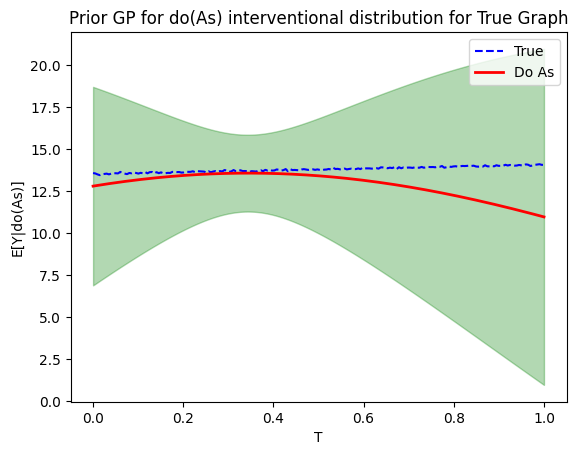

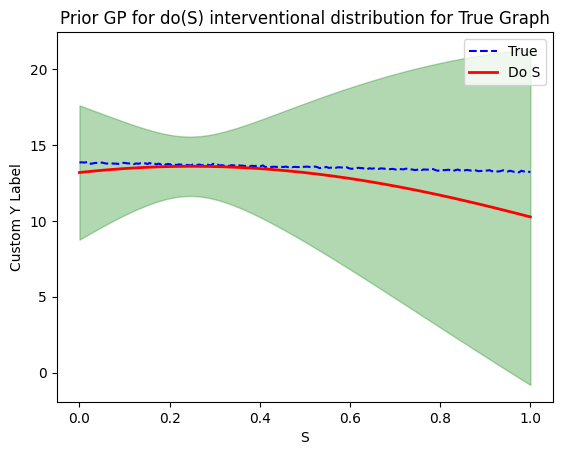

In [3]:
plot_prior(0)

INFO:root:Using predefined values for the optimization algorithm
INFO:root:Fitting child: As to parents: ['A', 'B'] for [('A', 'B'), ('A', 'C'), ('A', 'S'), ('A', 'As'), ('A', 'Y'), ('B', 'As'), ('B', 'C'), ('B', 'S'), ('B', 'Y'), ('As', 'C'), ('S', 'C'), ('S', 'Y'), ('C', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:SAFE OPTIMZATION: Resetting kernel lenghtscale
INFO:root:SAFE OPTIMIZATION: resetting likelihood var to lower bound
INFO:root:Fitting child: B to parents: ['A'] for [('A', 'B'), ('A', 'C'), ('A', 'S'), ('A', 'As'), ('A', 'Y'), ('B', 'As'), ('B', 'C'), ('B', 'S'), ('B', 'Y'), ('As', 'C'), ('S', 'C'), ('S', 'Y'), ('C', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
 /Users/jeandurand/Documents/Masters Thesis/causal_bayes_opt/ceo_venv/lib/python3.10/site-packages/GPy/kern/src/rbf.py:52: RuntimeWarning:overflow encountered in

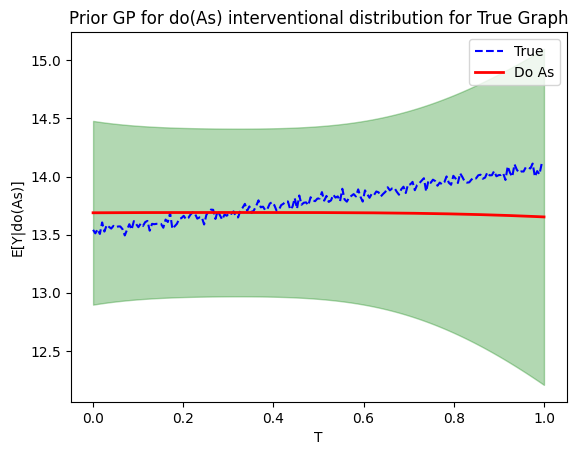

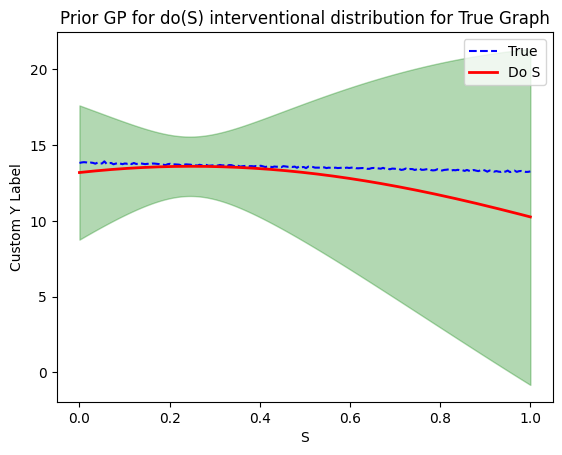

In [4]:
plot_prior(1)

INFO:root:Using predefined values for the optimization algorithm
INFO:root:Fitting child: As to parents: ['A', 'B'] for [('A', 'B'), ('A', 'C'), ('A', 'S'), ('A', 'As'), ('A', 'Y'), ('B', 'As'), ('B', 'C'), ('B', 'S'), ('B', 'Y'), ('As', 'C'), ('As', 'Y'), ('S', 'C'), ('C', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:SAFE OPTIMZATION: Resetting kernel lenghtscale
INFO:root:SAFE OPTIMIZATION: resetting likelihood var to lower bound
INFO:root:Fitting child: B to parents: ['A'] for [('A', 'B'), ('A', 'C'), ('A', 'S'), ('A', 'As'), ('A', 'Y'), ('B', 'As'), ('B', 'C'), ('B', 'S'), ('B', 'Y'), ('As', 'C'), ('As', 'Y'), ('S', 'C'), ('C', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
 /Users/jeandurand/Documents/Masters Thesis/causal_bayes_opt/ceo_venv/lib/python3.10/site-packages/GPy/kern/src/rbf.py:52: RuntimeWarning:overflow encountered 

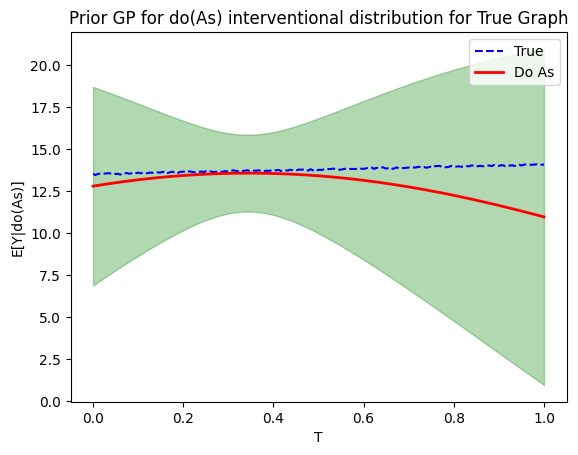

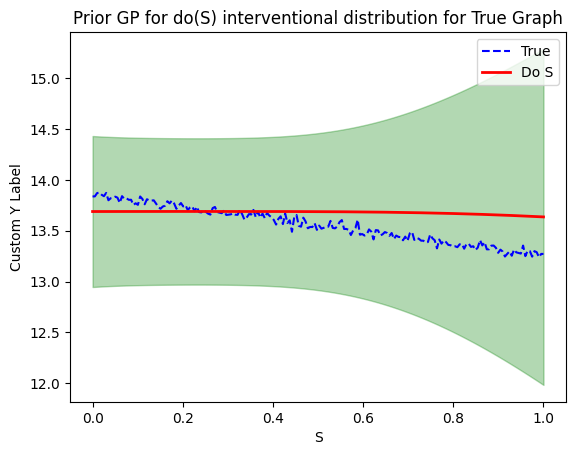

In [5]:
plot_prior(2)

INFO:root:Using predefined values for the optimization algorithm
INFO:root:Fitting child: As to parents: ['A', 'B'] for [('A', 'B'), ('A', 'C'), ('A', 'S'), ('A', 'As'), ('A', 'Y'), ('B', 'As'), ('B', 'C'), ('B', 'S'), ('B', 'Y'), ('As', 'C'), ('S', 'C'), ('C', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:SAFE OPTIMZATION: Resetting kernel lenghtscale
INFO:root:SAFE OPTIMIZATION: resetting likelihood var to lower bound
INFO:root:Fitting child: B to parents: ['A'] for [('A', 'B'), ('A', 'C'), ('A', 'S'), ('A', 'As'), ('A', 'Y'), ('B', 'As'), ('B', 'C'), ('B', 'S'), ('B', 'Y'), ('As', 'C'), ('S', 'C'), ('C', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
 /Users/jeandurand/Documents/Masters Thesis/causal_bayes_opt/ceo_venv/lib/python3.10/site-packages/GPy/kern/src/rbf.py:52: RuntimeWarning:overflow encountered in square
 /Users/jeandura

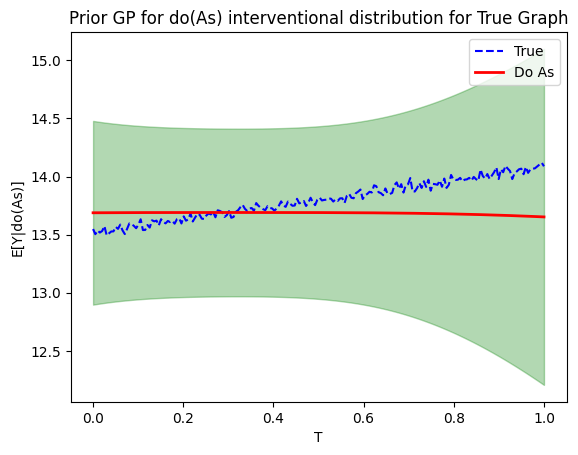

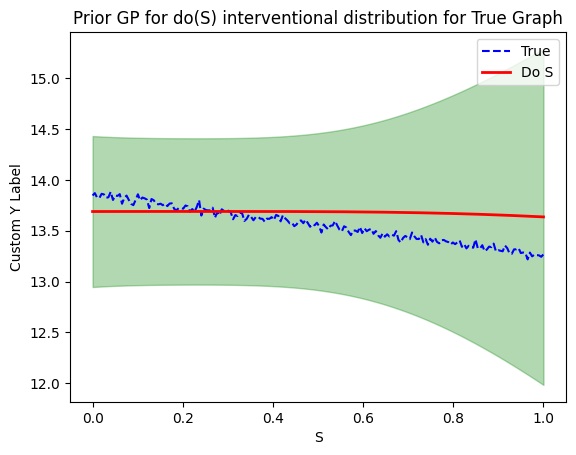

In [6]:
plot_prior(3)

INFO:root:Using predefined values for the optimization algorithm
INFO:root:Fitting child: As to parents: ['A', 'B'] for [('A', 'B'), ('A', 'C'), ('A', 'S'), ('A', 'As'), ('B', 'As'), ('B', 'C'), ('B', 'S'), ('As', 'C'), ('As', 'Y'), ('S', 'C'), ('S', 'Y'), ('C', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:SAFE OPTIMZATION: Resetting kernel lenghtscale
INFO:root:SAFE OPTIMIZATION: resetting likelihood var to lower bound
INFO:root:Fitting child: B to parents: ['A'] for [('A', 'B'), ('A', 'C'), ('A', 'S'), ('A', 'As'), ('B', 'As'), ('B', 'C'), ('B', 'S'), ('As', 'C'), ('As', 'Y'), ('S', 'C'), ('S', 'Y'), ('C', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
 /Users/jeandurand/Documents/Masters Thesis/causal_bayes_opt/ceo_venv/lib/python3.10/site-packages/GPy/kern/src/rbf.py:52: RuntimeWarning:overflow encountered in square
 /Users/jeandu

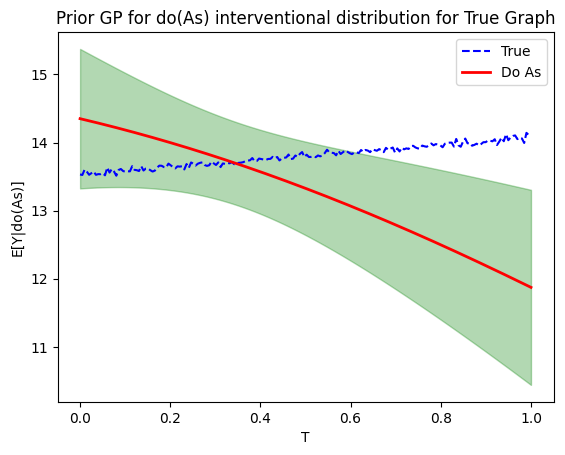

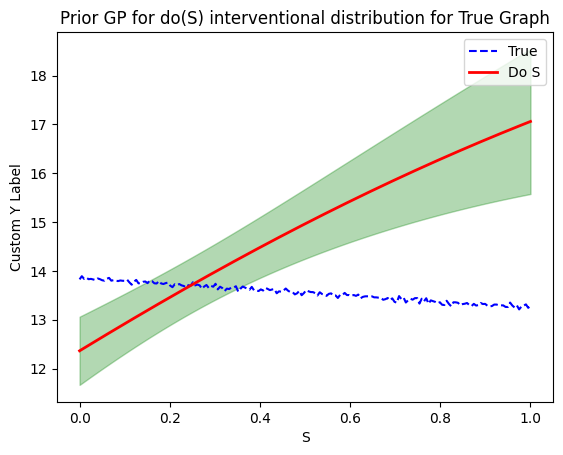

In [7]:
plot_prior(4)

INFO:root:Using predefined values for the optimization algorithm
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:SAFE OPTIMZATION: Resetting kernel lenghtscale
INFO:root:SAFE OPTIMIZATION: resetting likelihood var to lower bound
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:SAFE OPTIMIZATION: resetting likelihood var to lower bound
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
 /Users/jeandurand/Documents/Masters Thesis/causal_bayes_opt/ceo_venv/lib/python3.10/site-packages/GPy/kern/src/rbf.py:52: RuntimeWarning:overflow encountered in square
 /Users/jeandurand/Documents/Masters Thesis/causal_bayes_opt/ceo_venv/lib/python3.10/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in divide
 /Users/jeandurand/Documents/Masters Thesis/causal_bayes_o

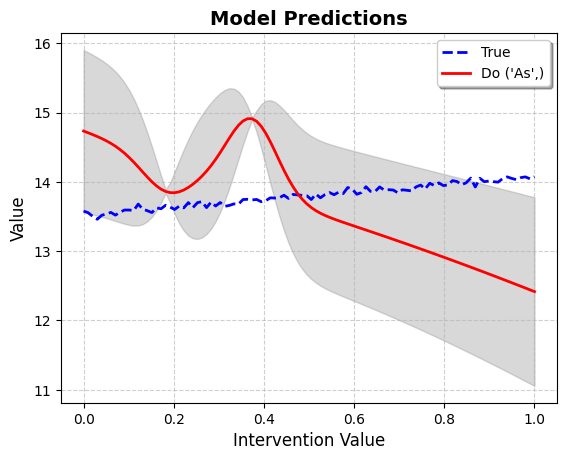

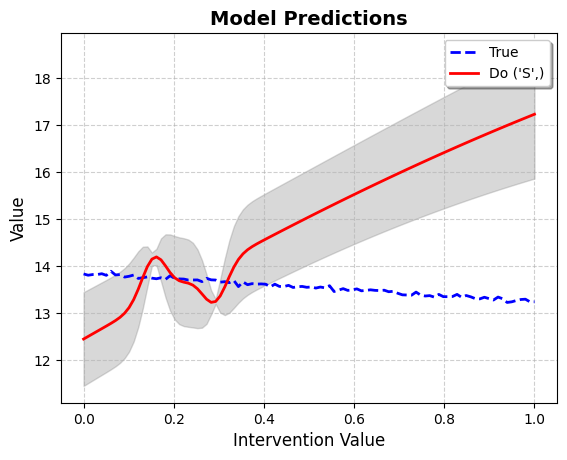

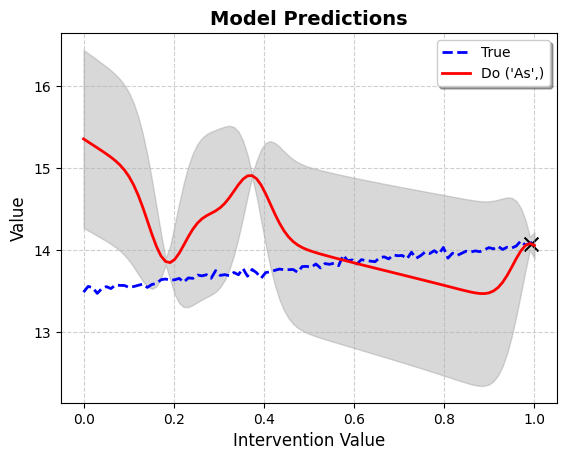

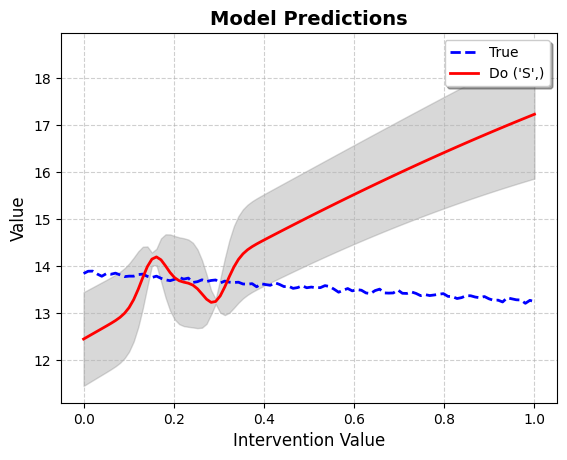

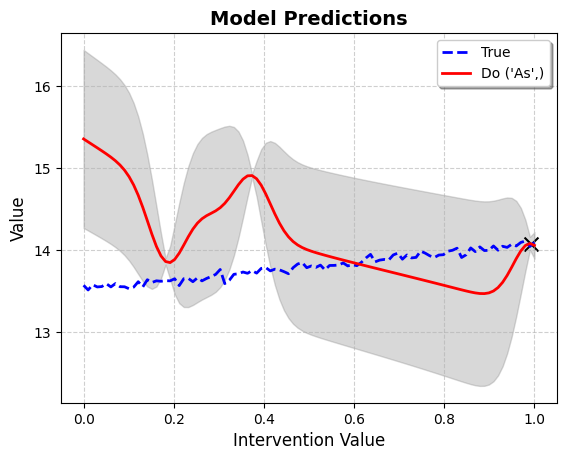

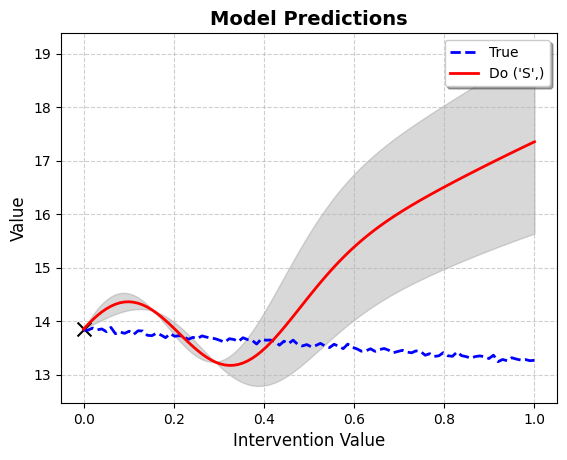

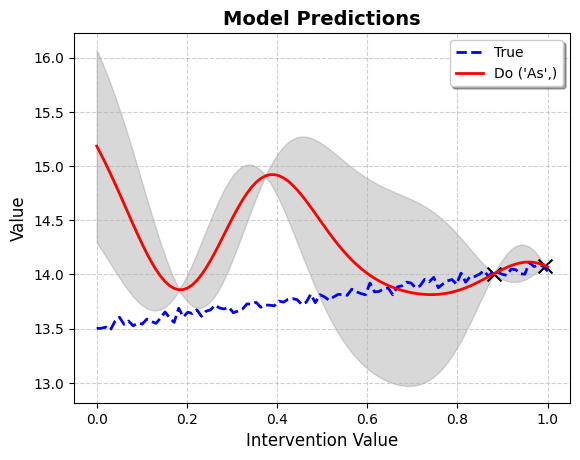

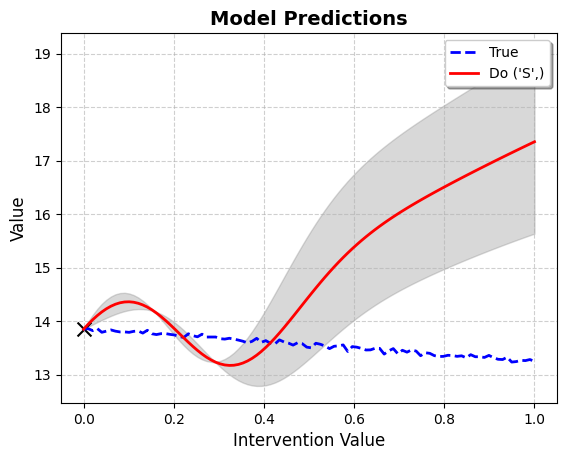

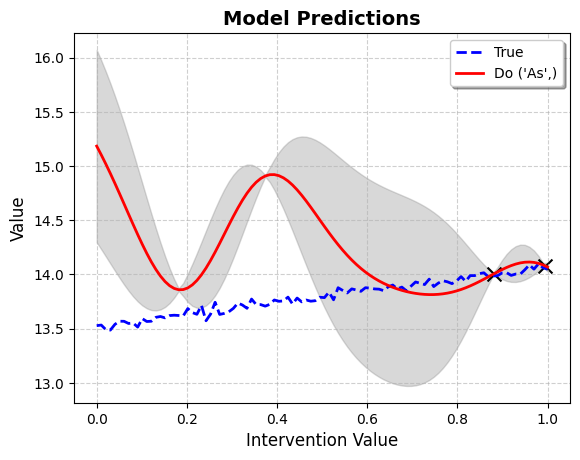

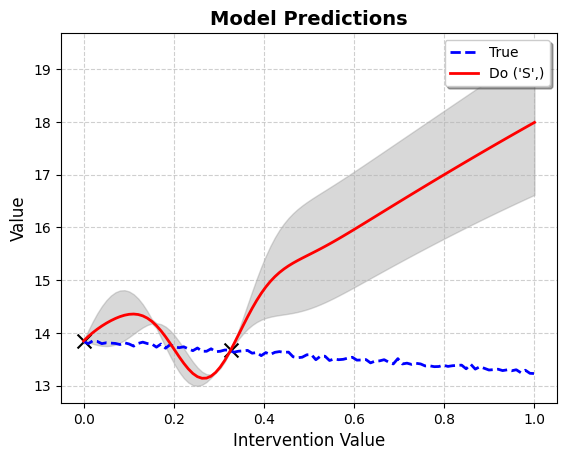

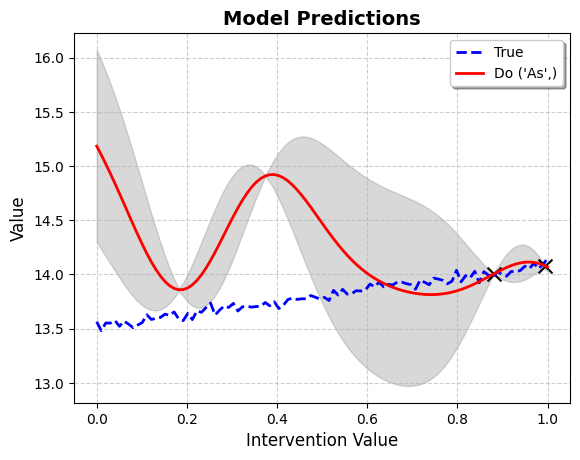

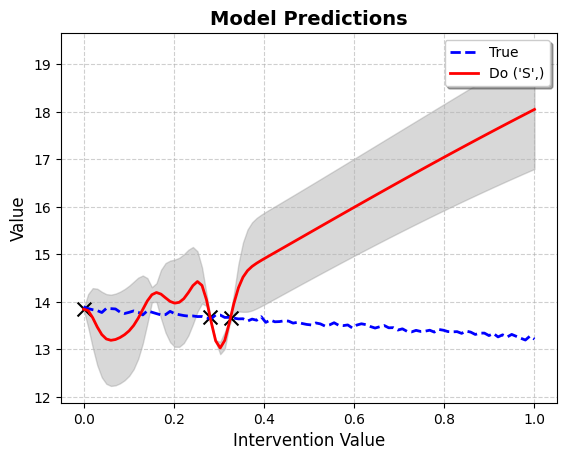

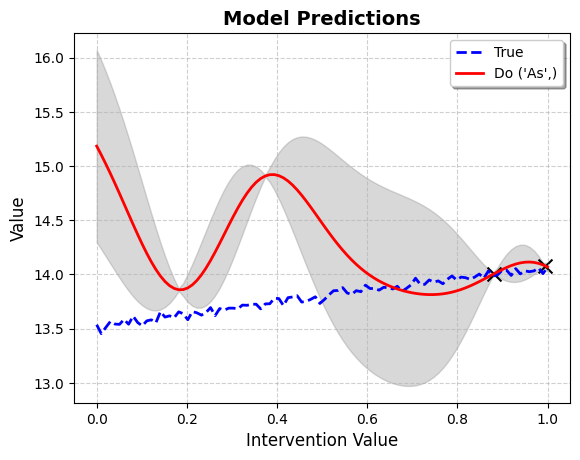

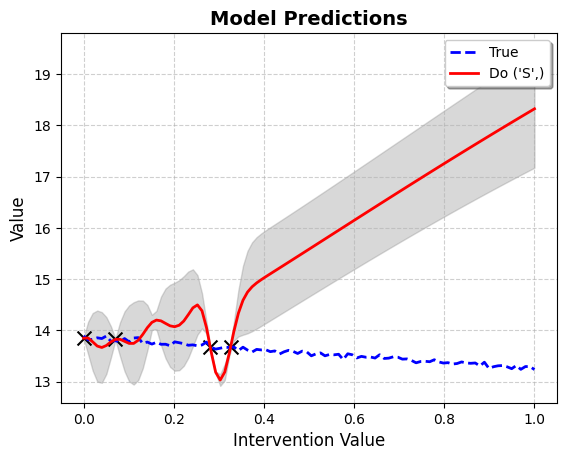

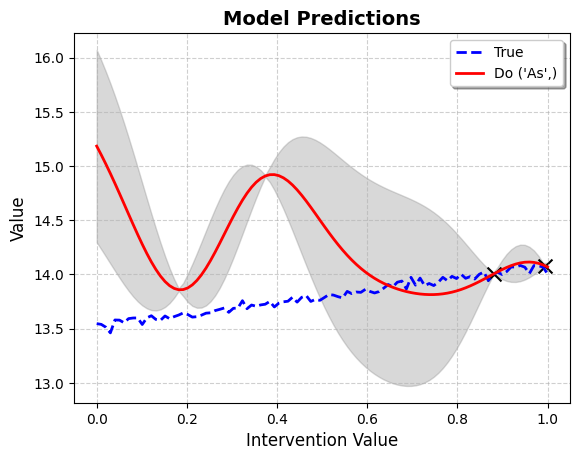

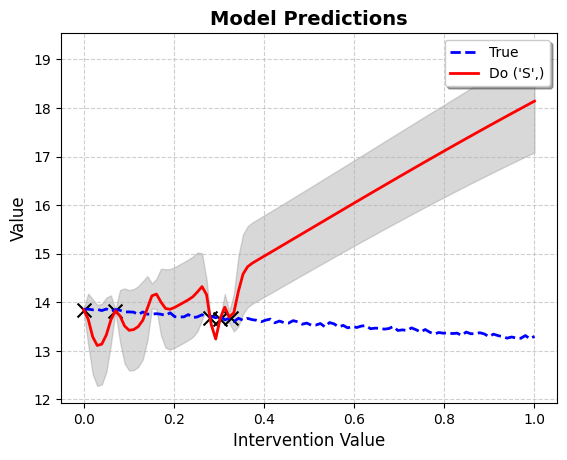

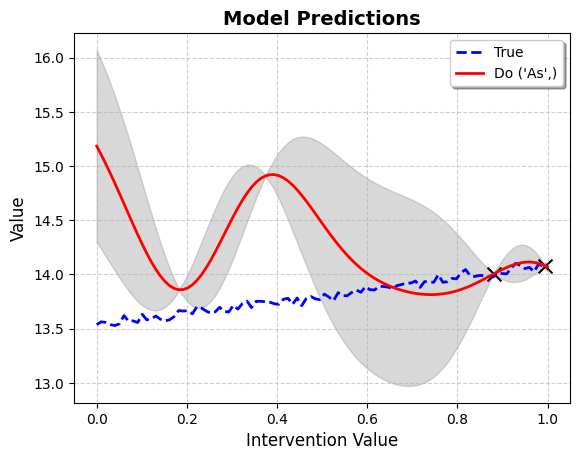

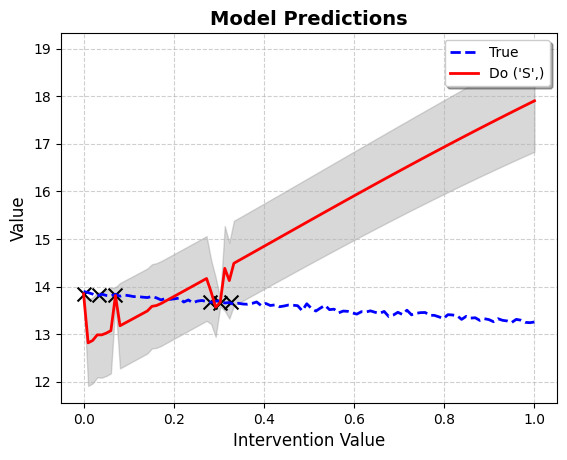

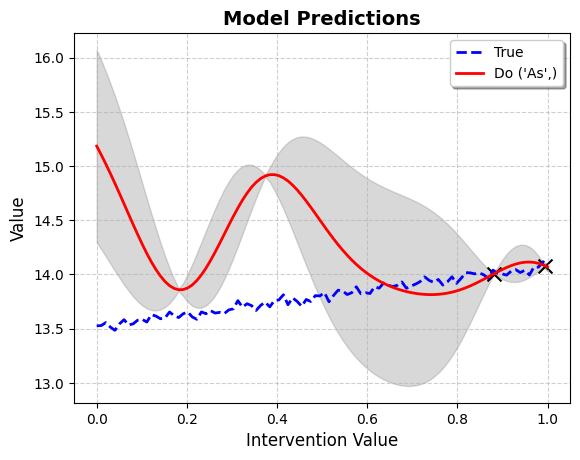

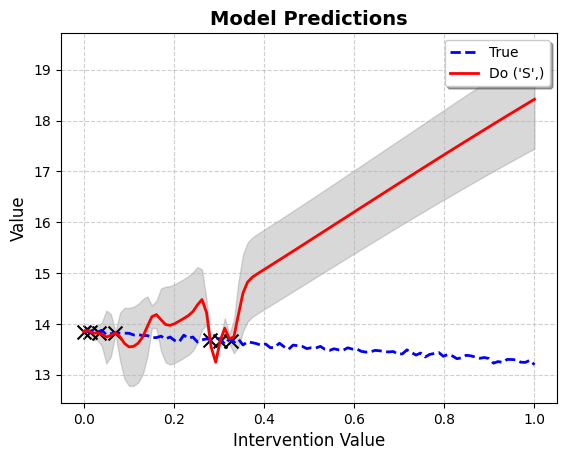

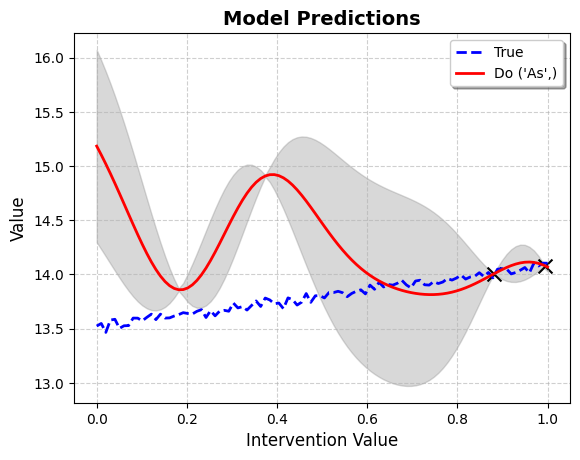

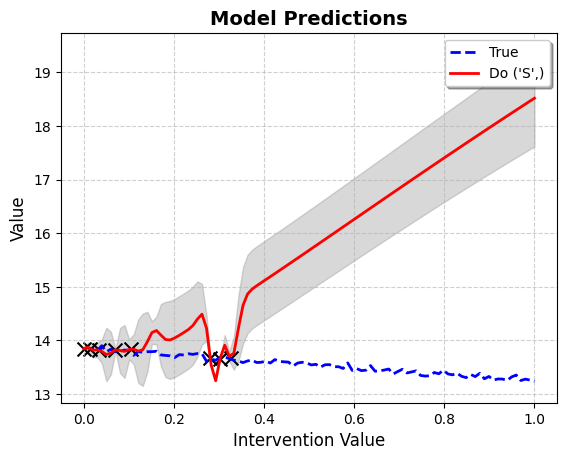

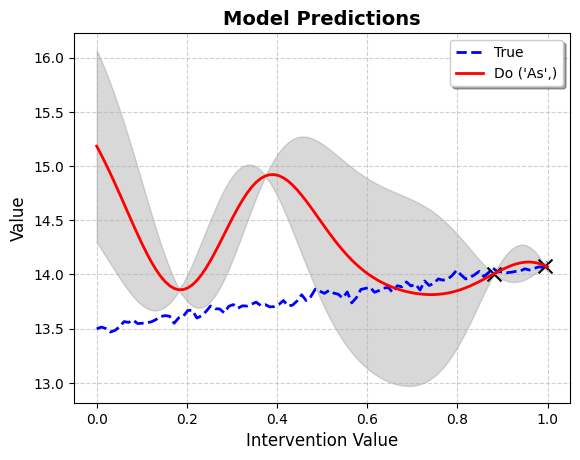

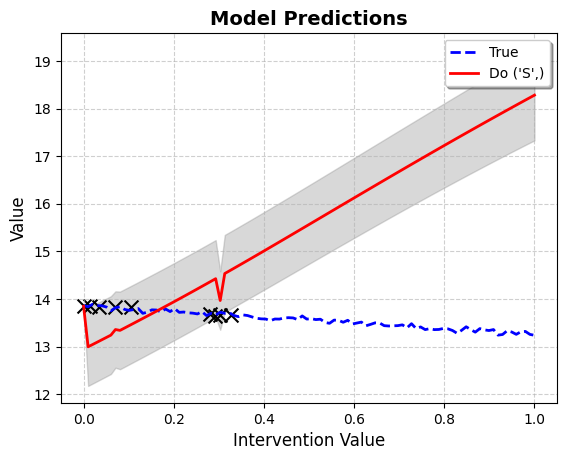

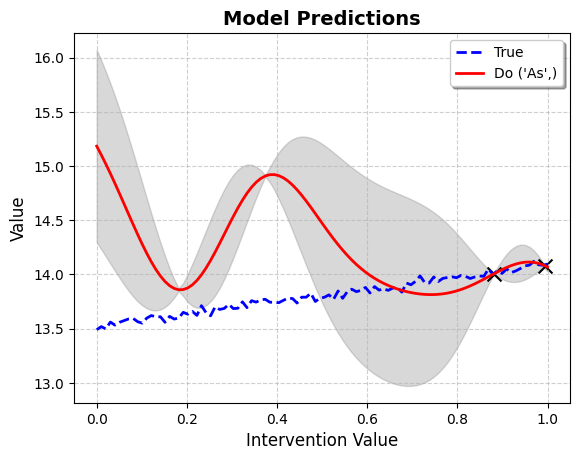

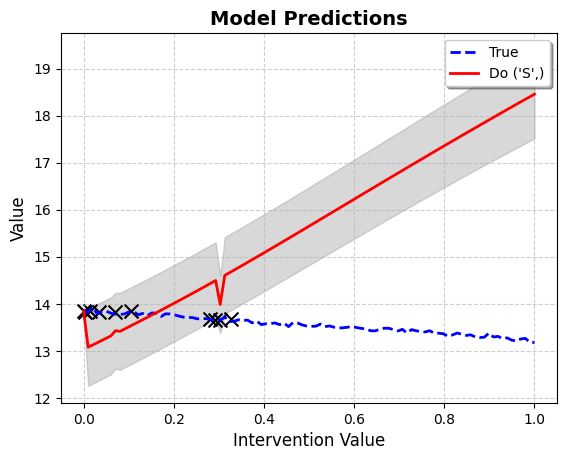

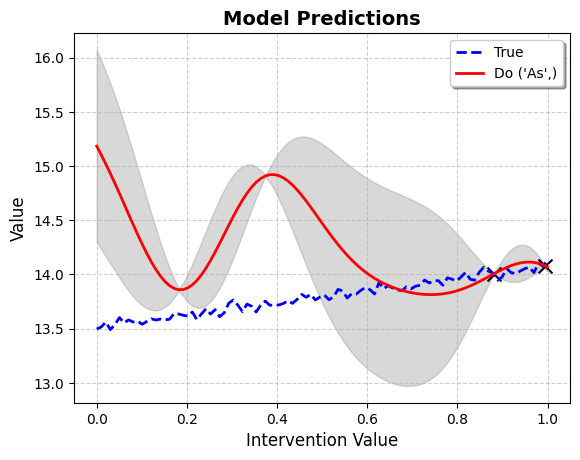

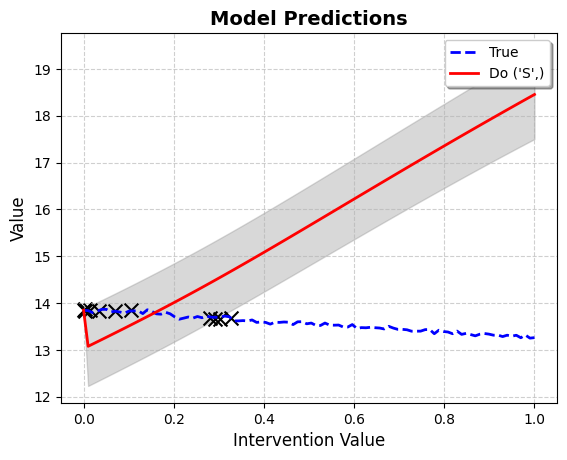

In [2]:
graph_num = 4
graph = Graph6Nodes()
graph.mispecify_graph(all_graph_edges[graph_num])
cbo_model = CBO(graph=graph)
cbo_model.set_values(deepcopy(D_O), deepcopy(D_I), exploration_set)
(global_opt,
current_y,
current_cost,
intervention_set,
intervention_values) = cbo_model.run_algorithm(T = 15, file=f"model_checkpoints/Graph6CBO/graph_{graph_num}")